#### 1. Use *fig.add_[h/v]line()* and *fig.add_[h/v]rect()* to mark, respspectively, location (mean and median) and scale (range, interquartile range, and a range defined by two standard deviations away from the mean in both directions) of *flipper_length_mm* for each _species_ onto _plotly_ histograms of *flipper_length_mm* for each _species_ in the penguins dataset

Location:

In [4]:
import plotly.graph_objects as go
import pandas as pd
import seaborn as sns
from plotly.subplots import make_subplots

# Load the penguins dataset
penguins = sns.load_dataset('penguins')

# Filter out rows with NaN values for simplicity
penguins = penguins.dropna(subset=['flipper_length_mm'])

# Create subplots for each species
species_list = penguins['species'].unique()
fig = make_subplots(rows=1, cols=len(species_list), subplot_titles=species_list, shared_yaxes=True)

# Loop through each species and add histograms, lines
for i, species in enumerate(species_list):
    species_data = penguins[penguins['species'] == species]['flipper_length_mm']
    
    # Calculate statistics
    mean = species_data.mean()
    median = species_data.median()
    
    # Create histogram for this species
    fig.add_trace(go.Histogram(x=species_data, name=f'{species} Flipper Length', opacity=0.75, marker_color='lightblue', showlegend=False),
                  row=1, col=i+1)
    
    # Add vertical lines for mean and median
    fig.add_vline(x=mean, line_dash="dash", line_color="blue", row=1, col=i+1,
                  annotation_text="Mean", annotation_position="top left")
    fig.add_vline(x=median, line_dash="dot", line_color="green", row=1, col=i+1,
                  annotation_text="Median", annotation_position="top left")

# Update layout
fig.update_layout(
    title="Flipper Length Distribution per Species with Mean and Median",
    barmode='overlay',
    xaxis_title="Flipper Length (mm)",
    yaxis_title="Count",
    template="plotly_white",
    showlegend=False
)

# Show the figure
fig.show()


Scale:

In [5]:
import plotly.graph_objects as go
import seaborn as sns
from plotly.subplots import make_subplots

# Load the penguins dataset
penguins = sns.load_dataset('penguins')

# Filter out rows with NaN values for simplicity
penguins = penguins.dropna(subset=['flipper_length_mm'])

# Create subplots for each species
species_list = penguins['species'].unique()
fig = make_subplots(rows=1, cols=len(species_list), subplot_titles=species_list, shared_yaxes=True)

# Define colors for each statistic
colors = {
    'range': 'orange',
    'iqr': 'purple',
    'std_range': 'red'
}

# Loop through each species and add histograms, lines, and rectangles
for i, species in enumerate(species_list):
    species_data = penguins[penguins['species'] == species]['flipper_length_mm']
    
    # Calculate statistics
    mean = species_data.mean()
    std = species_data.std()
    min_val = species_data.min()
    max_val = species_data.max()
    q1 = species_data.quantile(0.25)
    q3 = species_data.quantile(0.75)
    
    # Create histogram for this species
    fig.add_trace(go.Histogram(x=species_data, name=f'{species} Flipper Length', opacity=0.75, marker_color='lightblue', showlegend=False),
                  row=1, col=i+1)
    
    # Add vertical lines for range (min and max values)
    fig.add_vline(x=min_val, line_dash="solid", line_color=colors['range'], row=1, col=i+1,
                  annotation_text="Min", annotation_position="bottom left")
    fig.add_vline(x=max_val, line_dash="solid", line_color=colors['range'], row=1, col=i+1,
                  annotation_text="Max", annotation_position="bottom right")
    
    # Add vertical rectangles for ranges
    # IQR (Q1 to Q3)
    fig.add_vrect(x0=q1, x1=q3, fillcolor=colors['iqr'], opacity=0.3, line_width=0, row=1, col=i+1,
                  annotation_text="IQR", annotation_position="top left")
    
    # 2-standard-deviation range (mean - 2*std to mean + 2*std)
    fig.add_vrect(x0=mean - 2*std, x1=mean + 2*std, fillcolor=colors['std_range'], opacity=0.2, line_width=0, row=1, col=i+1,
                  annotation_text="2-Std", annotation_position="top right")

# Update layout
fig.update_layout(
    title="Flipper Length Scale per Species",
    barmode='overlay',
    xaxis_title="Flipper Length (mm)",
    yaxis_title="Count",
    template="plotly_white",
    showlegend=False
)

# Show the figure
fig.show()


Using ChatBot:
    
    https://chatgpt.com/share/66f600ef-1888-8012-8290-e8bb811323dc

#### 2. Transition your ChatBot session from the previous problem to repeat the previous problem, but this time using _seaborn_ **kernel density estimation** (KDE) plots to produce the desired figures organized in row of three plots

Location:

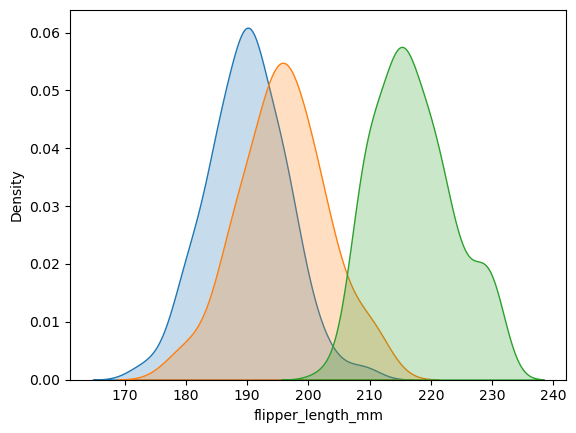

In [7]:
import seaborn as sns
import plotly.graph_objs as go
import plotly.subplots as sp
import pandas as pd
from plotly.subplots import make_subplots

# Load the penguins dataset
penguins = sns.load_dataset("penguins")

# Calculate mean and median for flipper length for each species
species_stats = penguins.groupby('species')['flipper_length_mm'].agg(['mean', 'median']).reset_index()

# Create a subplot with 3 histograms, one for each species
fig = make_subplots(rows=1, cols=3, subplot_titles=species_stats['species'], shared_yaxes=True)

# List of species
species_list = species_stats['species']

# Loop through each species to create KDEs and Histograms
for i, species in enumerate(species_list):
    # Filter data for this species
    species_data = penguins[penguins['species'] == species]['flipper_length_mm'].dropna()
    
    # Create KDE with Seaborn
    kde = sns.kdeplot(species_data, fill=True)
    
    # Add the histogram for the species in Plotly
    fig.add_trace(go.Histogram(
        x=species_data,
        name=f'{species} flipper_length_mm',
        opacity=0.7,
        histnorm='probability',
        marker=dict(color='blue')),
        row=1, col=i+1
    )
    
    # Extract mean and median
    mean = species_stats.loc[species_stats['species'] == species, 'mean'].values[0]
    median = species_stats.loc[species_stats['species'] == species, 'median'].values[0]
    
    # Add vertical lines for mean and median to the Plotly histograms
    fig.add_trace(go.Scatter(
        x=[mean, mean],
        y=[0, 1],
        mode="lines",
        name=f'{species} mean',
        line=dict(color='red', dash='dash')),
        row=1, col=i+1
    )
    fig.add_trace(go.Scatter(
        x=[median, median],
        y=[0, 1],
        mode="lines",
        name=f'{species} median',
        line=dict(color='green', dash='dot')),
        row=1, col=i+1
    )

# Update layout of the figure
fig.update_layout(title="Flipper Length Distribution for Penguin Species",
                  barmode='overlay', showlegend=False, height=600, width=900)

# Show the figure
fig.show()


Scale:

In [12]:
import plotly.graph_objects as go
import seaborn as sns
import numpy as np
from scipy.stats import gaussian_kde
from plotly.subplots import make_subplots

# Load the penguins dataset
penguins = sns.load_dataset('penguins')

# Filter out rows with NaN values for simplicity
penguins = penguins.dropna(subset=['flipper_length_mm'])

# Create subplots for each species (2 rows: one for histograms, one for KDE)
species_list = penguins['species'].unique()
fig = make_subplots(
    rows=2, 
    cols=len(species_list), 
    subplot_titles=species_list, 
    shared_yaxes=True,
    vertical_spacing=0.15  # Adjust vertical spacing between the rows
)

# Define colors for the vertical lines (mean and median)
colors = {
    'mean': 'blue',
    'median': 'green'
}

# Loop through each species and add histograms (in row 1) and KDE (in row 2)
for i, species in enumerate(species_list):
    species_data = penguins[penguins['species'] == species]['flipper_length_mm']
    
    # Calculate statistics
    mean = species_data.mean()
    median = species_data.median()
    
    # Create normalized histogram for this species (row 1)
    fig.add_trace(go.Histogram(
        x=species_data, 
        name=f'{species} Flipper Length', 
        opacity=0.6, 
        marker_color='lightblue', 
        histnorm='probability density',  # This normalizes the histogram
        showlegend=False
    ), row=1, col=i+1)
    
    # Add vertical lines for mean and median on the histogram
    fig.add_vline(
        x=mean, 
        line_dash="dash", 
        line_color=colors['mean'], 
        row=1, col=i+1,
        annotation_text="Mean", 
        annotation_position="top left"
    )
    fig.add_vline(
        x=median, 
        line_dash="dot", 
        line_color=colors['median'], 
        row=1, col=i+1,
        annotation_text="Median", 
        annotation_position="top right"
    )
    
    # Generate KDE data using Scipy's gaussian_kde (for row 2)
    kde = gaussian_kde(species_data, bw_method=0.5)  # Adjust bandwidth using bw_method if necessary
    kde_x = np.linspace(min(species_data), max(species_data), 1000)  # Generate x values for KDE
    kde_y = kde(kde_x)  # Generate y values for KDE (density)
    
    # Add KDE curve to the Plotly figure (row 2)
    fig.add_trace(go.Scatter(
        x=kde_x, 
        y=kde_y, 
        mode='lines', 
        line=dict(color='red', width=2), 
        name=f'{species} KDE',
        showlegend=False
    ), row=2, col=i+1)
    
    # Add vertical lines for mean and median on the KDE plot
    fig.add_vline(
        x=mean, 
        line_dash="dash", 
        line_color=colors['mean'], 
        row=2, col=i+1,
        annotation_text="Mean", 
        annotation_position="top left"
    )
    fig.add_vline(
        x=median, 
        line_dash="dot", 
        line_color=colors['median'], 
        row=2, col=i+1,
        annotation_text="Median", 
        annotation_position="top right"
    )

# Update layout for the subplots
fig.update_layout(
    title="Flipper Length Distribution per Species with Histograms (Top) and KDE (Bottom)",
    xaxis_title="Flipper Length (mm)",
    yaxis_title="Density",
    template="plotly_white",
    showlegend=False
)

# Show the figure
fig.show()


Summary of using Chatbot:
  
https://chatgpt.com/share/66f600ef-1888-8012-8290-e8bb811323dc

Initial Request: You asked for help marking the location (mean and median) and scale (range, interquartile range, and two standard deviations from the mean) of flipper_length_mm for each penguin species in the penguins dataset using Plotly histograms.

Clarification on KDE: You later shifted the request to adding Kernel Density Estimation (KDE) plots to represent flipper_length_mm for each species, overlaid on Plotly histograms.

Challenges with KDE in Plotly: Initially, Seaborn's KDE plot was used, but extracting KDE data from Seaborn and plotting it with Plotly was tricky. The code was updated to use Scipy’s gaussian_kde, which allowed direct computation of the KDE values for each species and plotting them alongside the histograms in Plotly.

Histogram and KDE on Same Axis: The first attempt involved normalizing the histograms to match the KDE's density scale. This made the KDE curve align with the histogram.

Separate KDE and Histogram: Finally, you requested to show KDE plots separately from the histograms. The code was updated to create a two-row layout: the first row displayed the histograms, and the second row displayed the KDE curves, with both mean and median values marked for each species in both rows.

Throughout the interaction, we worked step-by-step to ensure both the visual clarity of the KDE and histogram plots, as well as the correct integration of statistics.

#### 3. Search online for some images of **box plots**, **histograms**, and **kernel density estimators** (perhaps for the same data set); describe to a ChatBot what you think the contrasting descriptions of these three "data distribution" visualization methods are; and then see if the ChatBot agrees and what "pros and cons" list of these three "data distribution" visualization methods your ChatBot can come up with; finally, describe your preference for one or the other and your rationale for this preference

History of my conversation with the ChatBot, including I tell the ChatBot my thought on comparing these three data distribution visualization methods and ask the ChatBot if it agree with it:

https://chatgpt.com/share/66f609f1-5398-8012-8124-075058e51a39
  

#Pros and cons:

Here is the pros and cons list for box plots, histograms, and kernel density estimators (KDE)that my ChatBot give me:

### Box Plots

#### Pros:
- **Summarization**: Provides a clear summary of key statistics (median, quartiles, and potential outliers).
- **Comparison**: Effective for comparing distributions across multiple groups or categories.
- **Outlier Detection**: Easily identifies outliers, making them valuable for data quality assessment.

#### Cons:
- **Detail Loss**: Does not convey the full distribution shape or the presence of multiple modes.
- **Limited Data Representation**: May be less informative for small sample sizes, as it can obscure variability.
- **Interpretation**: Can be misinterpreted if the audience is unfamiliar with the format.

---

### Histograms

#### Pros:
- **Frequency Representation**: Clearly shows the frequency distribution of data, allowing easy identification of patterns and trends.
- **Shape Analysis**: Useful for assessing the shape of the distribution (e.g., normal, skewed, bimodal).
- **Customizable**: Bin size can be adjusted to fit specific analysis needs.

#### Cons:
- **Bin Sensitivity**: The choice of bin width can dramatically affect the appearance and interpretation of the histogram.
- **Information Overload**: Too many bins can create noise, while too few can oversimplify the data.
- **Limited Comparisons**: Difficult to compare multiple distributions on the same plot without additional features (e.g., overlaying).

---

### Kernel Density Estimators (KDE)

#### Pros:
- **Smooth Representation**: Provides a smooth estimate of the data distribution, revealing underlying patterns and structures.
- **Flexible Bandwidth**: Can adjust the bandwidth to control smoothness, allowing for tailored analysis of data features.
- **Comparison Across Groups**: Effective for overlaying multiple distributions for comparison.

#### Cons:
- **Bandwidth Selection**: Choosing the wrong bandwidth can lead to misleading interpretations (too smooth or too jagged).
- **Computationally Intensive**: May require more computational resources for larger datasets compared to histograms.
- **Less Familiar**: Some audiences may find KDE plots less intuitive compared to histograms or box plots.


#My preference:
Kernel Density Estimators (KDE).

Reason: I want to choose KDE as my preference because: 1. On KDE, smooth curves can easily let us see the overall shape and trend of data distribution. 2. We can easily locate the peak, which means we can see where most of the data is concentrated, and easily find the location of the same data values.

#### 4. Run the code below and look at the resulting figure of distrubutions and then answer the following questions

In [19]:
from scipy import stats
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

n = 1500
data1 = stats.uniform.rvs(0, 10, size=n)
data2 = stats.norm.rvs(5, 1.5, size=n)
data3 = np.r_[stats.norm.rvs(2, 0.25, size=int(n/2)), stats.norm.rvs(8, 0.5, size=int(n/2))]
data4 = stats.norm.rvs(6, 0.5, size=n)

fig = make_subplots(rows=1, cols=4)

fig.add_trace(go.Histogram(x=data1, name='A', nbinsx=30, marker=dict(line=dict(color='black', width=1))), row=1, col=1)
fig.add_trace(go.Histogram(x=data2, name='B', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=2)
fig.add_trace(go.Histogram(x=data3, name='C', nbinsx=45, marker=dict(line=dict(color='black', width=1))), row=1, col=3)
fig.add_trace(go.Histogram(x=data4, name='D', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=4)

fig.update_layout(height=300, width=750, title_text="Row of Histograms")
fig.update_xaxes(title_text="A", row=1, col=1)
fig.update_xaxes(title_text="B", row=1, col=2)
fig.update_xaxes(title_text="C", row=1, col=3)
fig.update_xaxes(title_text="D", row=1, col=4)
fig.update_xaxes(range=[-0.5, 10.5])

for trace in fig.data:
    trace.xbins = dict(start=0, end=10)
    
# This code was produced by just making requests to Microsoft Copilot
# https://github.com/pointOfive/stat130chat130/blob/main/CHATLOG/wk3/COP/SLS/0001_concise_makeAplotV1.md

fig.show() # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

1. Which datasets have similar means and similar variances: A and C  
2. Which datasets have similar means but quite different variances: A and B
3. Which datasets have similar variances but quite different means: B and D
4. Which datasets have quite different means and quite different variances: A and D

#### 5. Start a new ChatBot session to explore the general relationship between the *mean* and *median* and "right" and "left" skewness (and why this is); what the following code does and how it works; and then explain (in your own words) the relationship between the *mean* and *median* and "right" and "left" skewness and what causes this, using and extending the code to demonstrate your explanation through a sequence of notebook cells.

Mean: The average value of a dataset, which will affected by extreme values.

Median: The middle value of a dataset after ordered.  

Skewness: The asymmetry of the distribution of values in a dataset.

Right Skewness (Positive Skew): The number of data on the right side of the distribution is larger.
Left Skewness (Negative Skew): The number of data on the left side of the distribution is larger.

Relationships：

Right Skew (Positive Skew) means that when data is right-skewed, it contains more extremely high values, which will make the mean larger than the median.

Conversely, for Left Skew (Negative Skew), there are more extremely low values on the left, which will make the median higher than the mean.

Code Analysis:

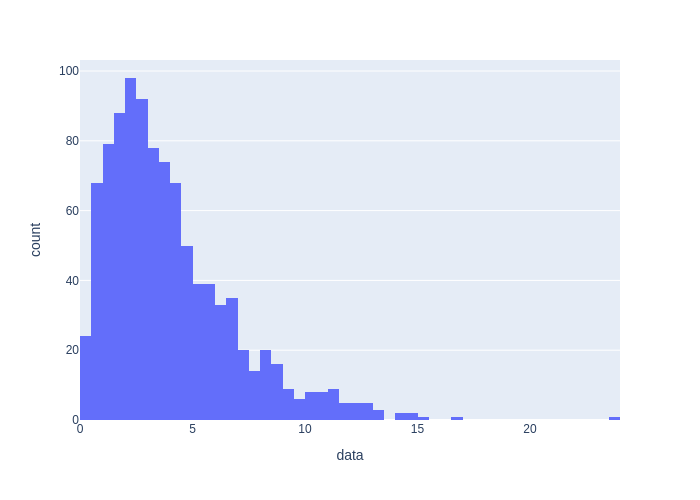

In [20]:
from scipy import stats
import pandas as pd
import numpy as np
import plotly.express as px

# Generate a right-skewed sample
sample1 = stats.gamma(a=2, scale=2).rvs(size=1000)
fig1 = px.histogram(pd.DataFrame({'data': sample1}), x="data")
fig1.show(renderer="png")  # Displays the histogram

# Calculate mean and median
mean_sample1 = sample1.mean()
median_sample1 = np.quantile(sample1, [0.5])  # median


Extending the code:

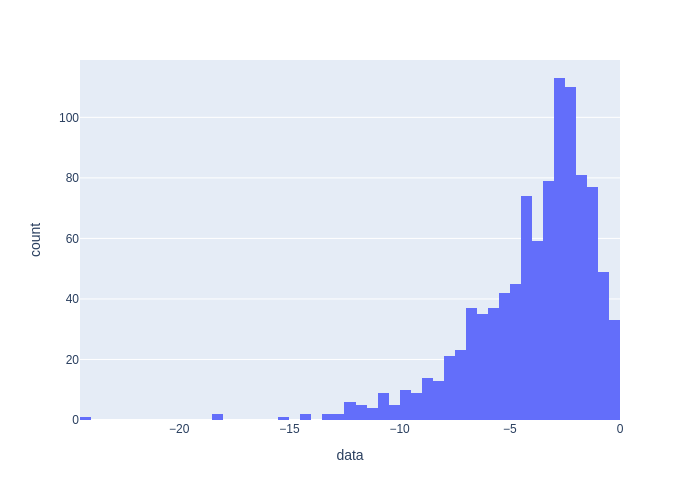

(4.018980871455645,
 array([3.27934241]),
 -3.9691330051949727,
 array([-3.19927095]))

In [21]:
# Generate a left-skewed sample
sample2 = -stats.gamma(a=2, scale=2).rvs(size=1000)
fig2 = px.histogram(pd.DataFrame({'data': sample2}), x="data")
fig2.show(renderer="png")  # Displays the histogram

# Calculate mean and median for the left-skewed sample
mean_sample2 = sample2.mean()
median_sample2 = np.quantile(sample2, [0.5])  # median

mean_sample1, median_sample1, mean_sample2, median_sample2


ChatBot Summary:
    
    https://chatgpt.com/share/66f61c4f-a11c-8012-9878-05dbd94cb7ca

1. Skewness Explanation: You asked about the relationship between the mean and median in relation to right and left skewness. I explained that in a right-skewed distribution, the mean is greater than the median, while in a left-skewed distribution, the mean is less than the median.

2. Code Demonstration: You requested a way to use code to demonstrate this explanation. I provided a Python code example that generates right-skewed and left-skewed datasets, calculates their mean and median, and visualizes the distributions using histograms.


#### 6. Go find an interesting dataset and use summary statistics and visualizations to understand and demonstate some interesting aspects of the data

Here is the interasting dataset I found:

https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv

In [23]:
pip install pandas matplotlib seaborn


Note: you may need to restart the kernel to use updated packages.


   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

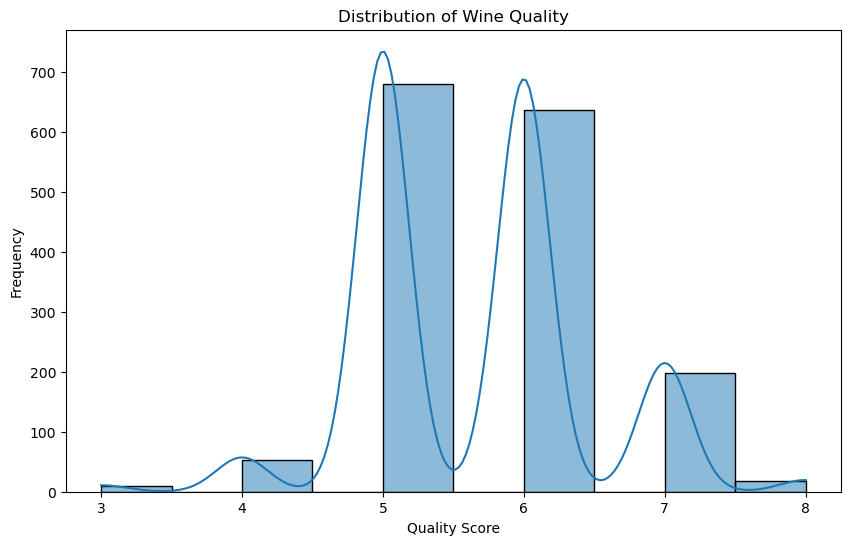

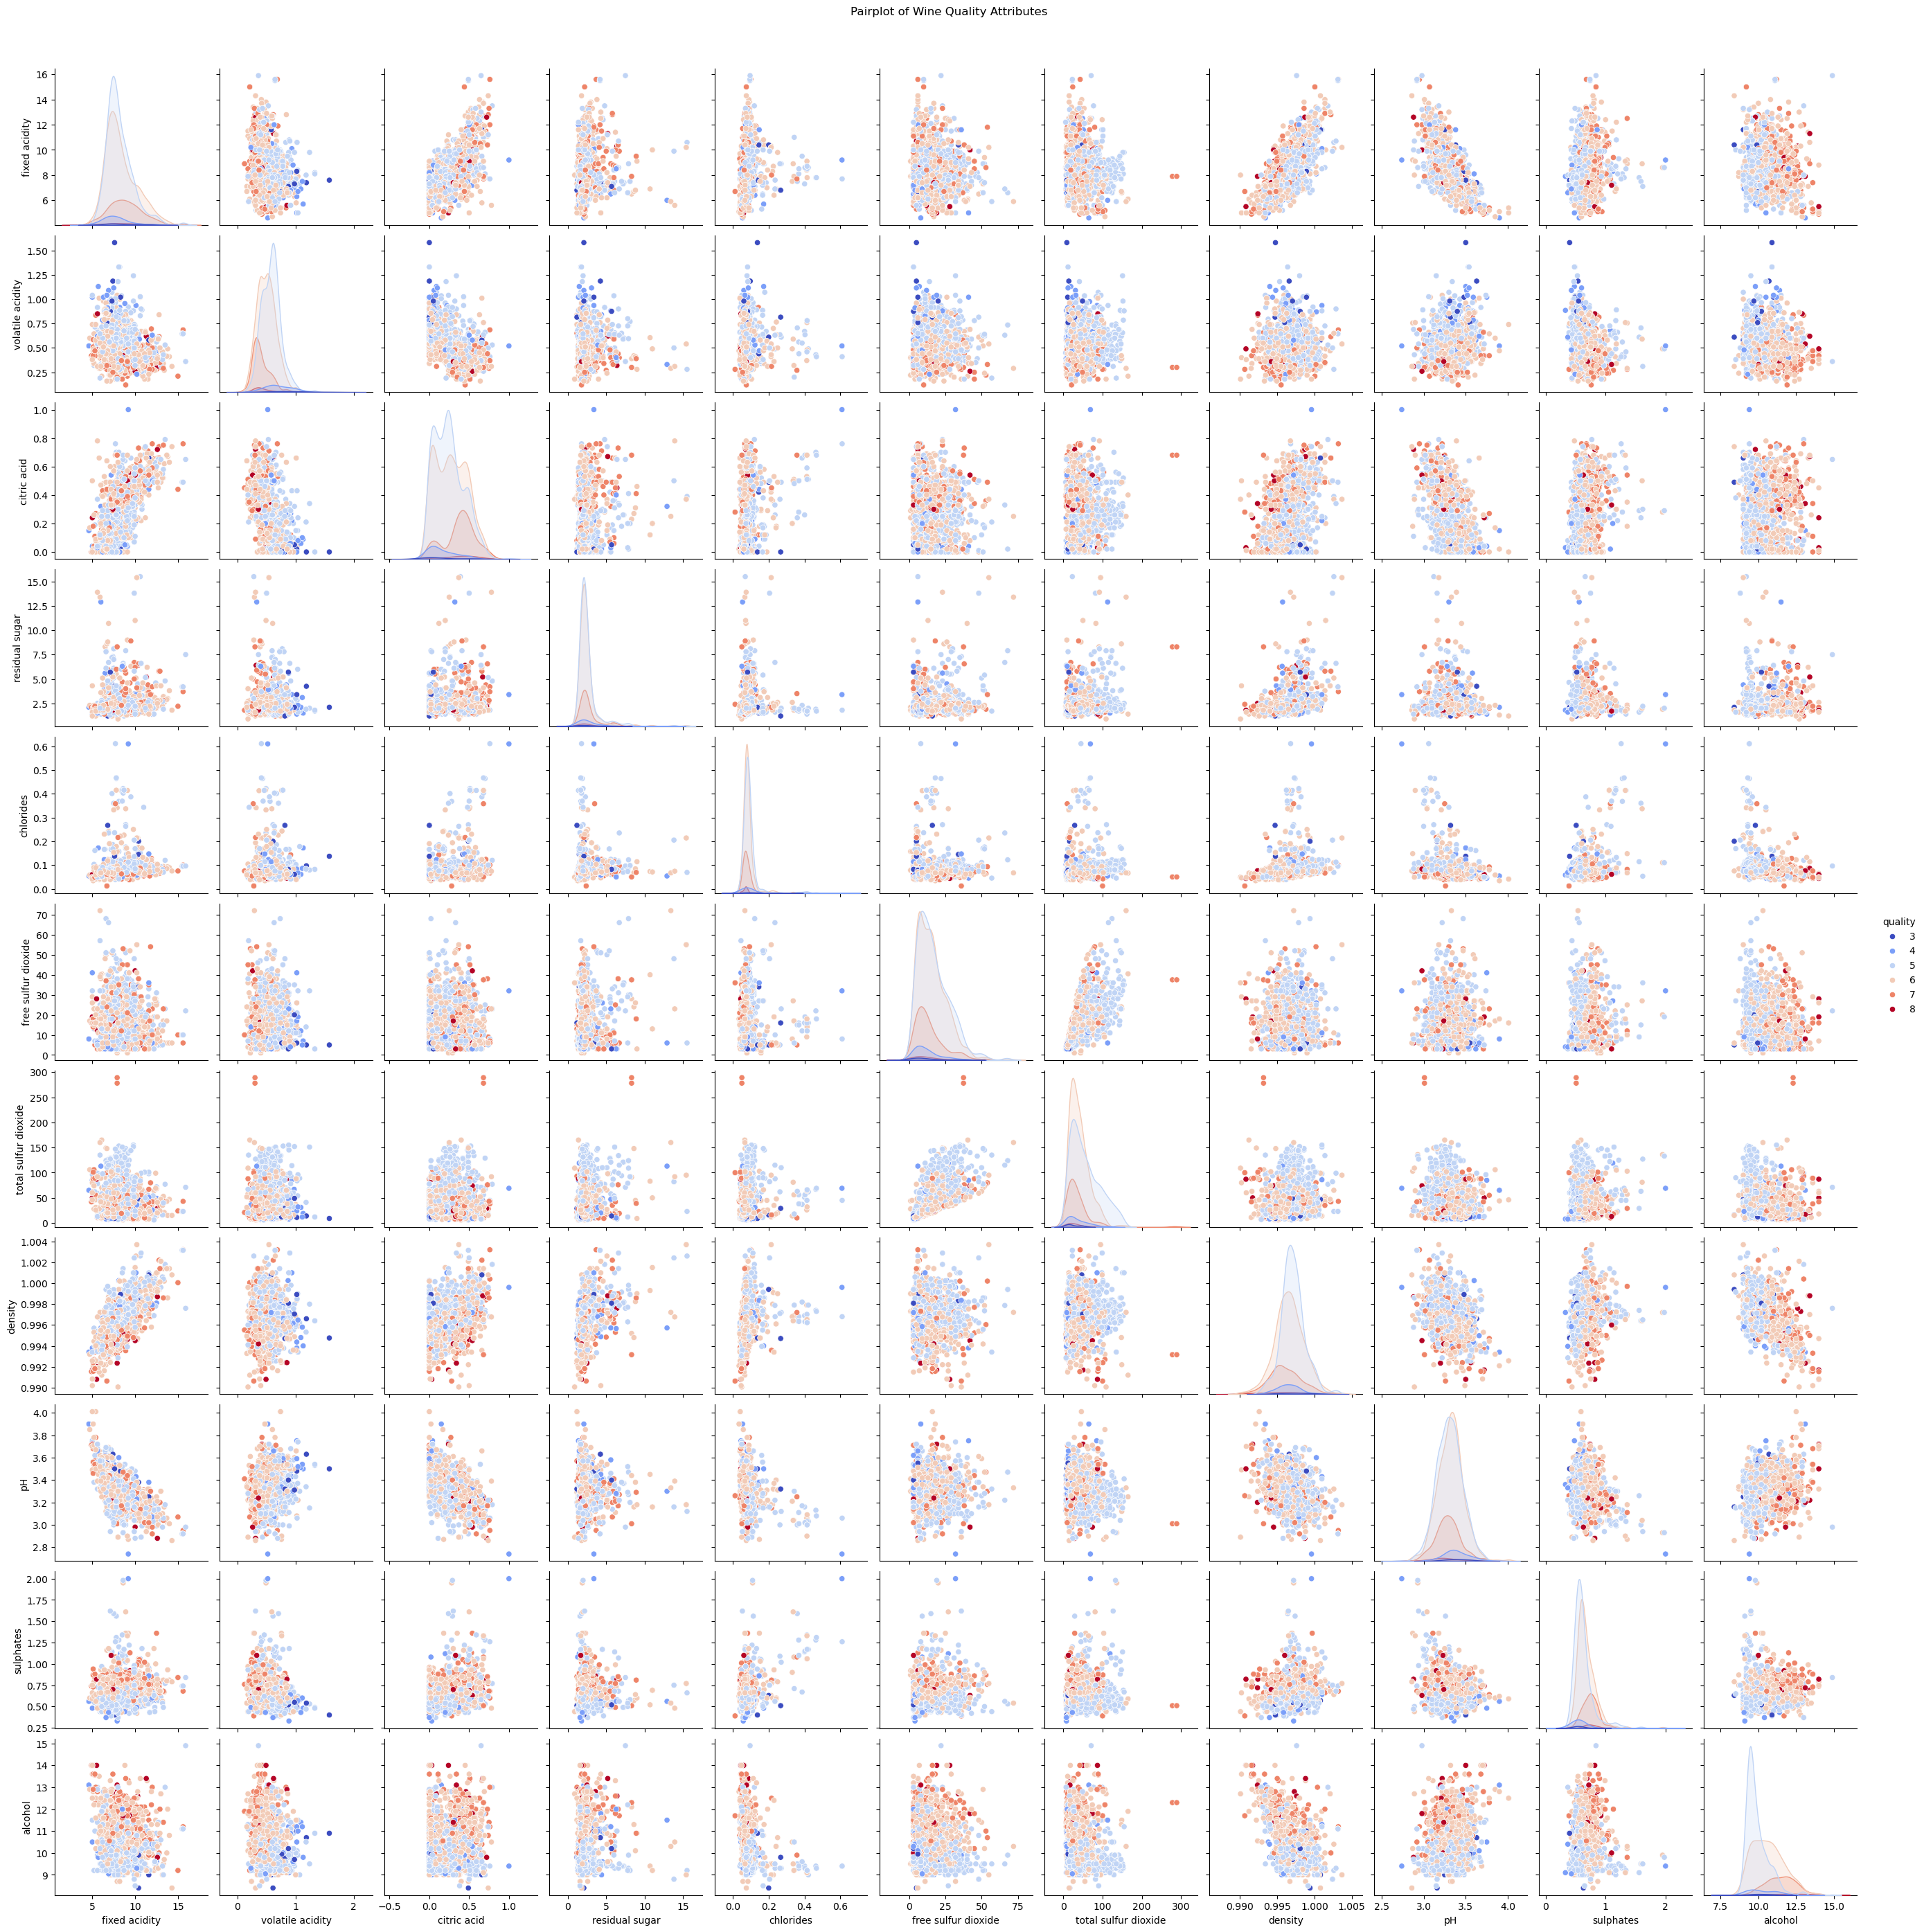

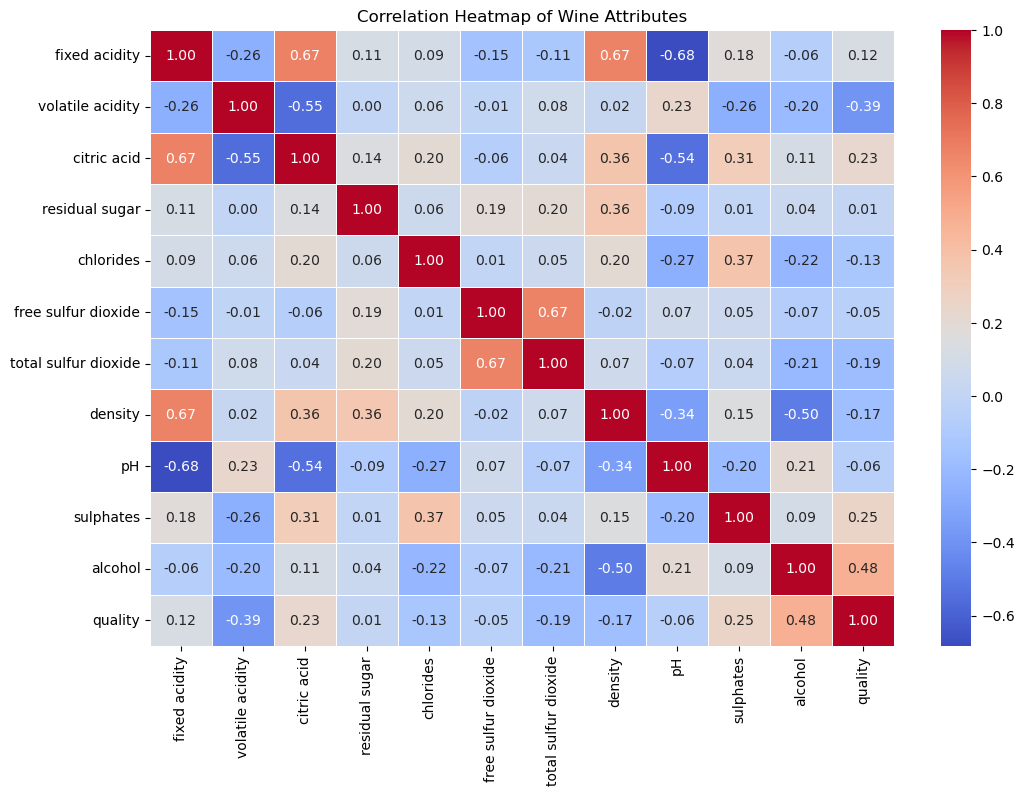

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (make sure to set the correct path)
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
data = pd.read_csv(url, sep=';')

# Display the first few rows of the dataset
print(data.head())

# Summary statistics
summary_stats = data.describe()
print(summary_stats)

# Visualizations
plt.figure(figsize=(10, 6))

# Distribution of Wine Quality
sns.histplot(data['quality'], bins=10, kde=True)
plt.title('Distribution of Wine Quality')
plt.xlabel('Quality Score')
plt.ylabel('Frequency')
plt.show()

# Pairplot to visualize relationships between features
sns.pairplot(data, hue='quality', markers='o', palette='coolwarm')
plt.suptitle('Pairplot of Wine Quality Attributes', y=1.02)
plt.show()

# Correlation Heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap of Wine Attributes')
plt.show()


Some interesting aspects:
    
1. The histogram of the quality scores show that certain scores are more prevalent than others, like 5 and 6 which are more common.This distribution can indicate a preference  for wine producers to aim for certain quality ranges.
2. The correlation heatmap may show a strong positive correlation between alcohol content and quality scores, which means that higher alcohol levels are associated with better wine quality.  
3. The scatter plots in the pairplot reveals some extreme values：wines with low quality but high alcohol content or acidity.This shows the condition of production.

I asked the ChatBot to give me some advice on how to consummating my full code.

This is the summary: https://chatgpt.com/share/66f62839-c35c-8012-86d4-d3406e70d909

#### 7. Watch the classic [Gapminder Video](https://www.youtube.com/watch?v=jbkSRLYSojo), then have a look at the [`plotly` version](https://plotly.com/python/animations/) and recreate the animation (perhaps after optionally exploring and changing the [style](https://plotly.com/python/templates/), if you wish)

#### 8. Provide a second version of the figure from the previous problem where you edit the `fig = px.scatter()` function from the Gapminder code so that `x` is "percent change", `y` is "rank", `size` is "percent", and `color`="sex", `animation_frame` is "year", and `animation_group` and `hover_name` are "name". Then use `size_max=50`, `range_x=[-0.005,0.005])` and remove the `log_x=True` and `range_y` parameters

This is the summary that I used ChatBot to help me do question7 and 8:

https://chatgpt.com/share/66f625bd-1848-8012-ad72-26ccdcd45d7c


#### 9. Have you reviewed the course wiki-textbook and interacted with a ChatBot (or, if that wasn't sufficient, real people in the course piazza discussion board or TA office hours) to help you understand all the material in the tutorial and lecture that you didn't quite follow when you first saw it?

Yes.